In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [2]:
SEED = 42

Primeramente vamos a crear los dataframes leyendo los CSV, con index_col = 0 para no extraer dicha columna

In [3]:
coords_dataframe = pd.read_csv("../data/rawData/coords_diamonds.csv", index_col= 0)

diamonds_dataframe = pd.read_csv("../data/rawData/diamonds.csv", index_col= 0)

stolen_diamonds_dataframe = pd.read_csv("../data/rawData/stolen_diamonds.csv")

In [4]:
stolen_diamonds_dataframe

,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates
0,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351"
1,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961"
2,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673"
3,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730"
4,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602"
5,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87,"35.26611, -99.63874"
6,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16,"35.51572, -97.67080"
7,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13,"36.163605, -95.75950"
8,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,"37.689186, -92.6473"
9,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86,"38.66303, -90.21808"


A partir de esto, toca darle un vistazo inicial a los dataframes para determinar su estructura

In [5]:
coords_dataframe.head()

,latitude,longitude
0,39.8813889,-83.093056
1,33.4150000,-111.548889
2,40.1672222,-105.101389
3,37.3711111,-85.583056
4,48.5394444,-121.745000


In [6]:
coords_dataframe.describe()

,longitude
count,53930.000000
mean,-86.693792
std,39.773132
min,-173.985008
25%,-112.073333
50%,-87.889167
75%,-78.680278
max,178.017649


In [7]:
coords_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    53930 non-null  object 
 1   longitude   53930 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [8]:
diamonds_dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds_dataframe.describe()

,carat,depth,table,price,x,y,z
count,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000
mean,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141
std,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909
min,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
diamonds_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    50968 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        52840 non-null  float64
 8   y        53345 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Vamos a crear un dataframe uniendo ambos, concatenando usando axis=1 para que se agreguen las columnas

In [11]:
data = pd.concat([coords_dataframe, diamonds_dataframe], axis=1)

In [12]:
data.columns = data.columns.map(lambda x: x.strip().lower())


Una vez esto, vamos a darle nuevamente una inspección al dataframe para comenzar con la exploración de los datos

In [13]:
data.head()

,latitude,longitude,carat,cut,color,clarity,depth,table,price,x,y,z
0,39.8813889,-83.093056,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,33.4150000,-111.548889,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,40.1672222,-105.101389,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,37.3711111,-85.583056,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,48.5394444,-121.745000,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
data.describe()

,longitude,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000
mean,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141
std,39.773132,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909
min,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000
25%,-112.073333,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,-87.889167,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   53930 non-null  object 
 1   longitude  53930 non-null  float64
 2   carat      53930 non-null  float64
 3   cut        53930 non-null  object 
 4   color      53930 non-null  object 
 5   clarity    53930 non-null  object 
 6   depth      50968 non-null  float64
 7   table      53930 non-null  float64
 8   price      53930 non-null  int64  
 9   x          52840 non-null  float64
 10  y          53345 non-null  float64
 11  z          53930 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 5.3+ MB


Vamos a revisar cuáles fueron las principales características con valores nulos

In [16]:
null_values = data.isna().sum()
print(null_values)

latitude        0
longitude       0
carat           0
cut             0
color           0
clarity         0
depth        2962
table           0
price           0
x            1090
y             585
z               0
dtype: int64


Para poder arreglar dichos valores nulos, es necesario segmentarlos en datos categóricos y datos numéricos

In [17]:
data_numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(data_numerical_features)

['longitude', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [18]:
data_categorical_features = data.drop(columns=data_numerical_features).columns.tolist()
print(data_categorical_features)

['latitude', 'cut', 'color', 'clarity']


### Data Cleaning

Primeramente, vamos a revisar los datos categóricos por si en ellos existen valores numéricos mal parseados

In [19]:
categorical_features = data[data_categorical_features]

In [20]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   latitude  53930 non-null  object
 1   cut       53930 non-null  object
 2   color     53930 non-null  object
 3   clarity   53930 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [21]:
categorical_features.describe()

,latitude,cut,color,clarity
count,53930,53930,53930,53930
unique,15210,26,26,30
top,47.6063889,Ideal,G,SI1
freq,398,21537,11284,13058


In [22]:
categorical_features.head()

,latitude,cut,color,clarity
0,39.8813889,Ideal,E,SI2
1,33.4150000,Premium,E,SI1
2,40.1672222,Good,E,VS1
3,37.3711111,Premium,I,VS2
4,48.5394444,Good,J,SI2


In [23]:
data_categorical_features.remove('latitude')

In [24]:
categorical_features.head()

,latitude,cut,color,clarity
0,39.8813889,Ideal,E,SI2
1,33.4150000,Premium,E,SI1
2,40.1672222,Good,E,VS1
3,37.3711111,Premium,I,VS2
4,48.5394444,Good,J,SI2


In [25]:
categorical_features = data[data_categorical_features]

In [26]:
data_numerical_features.append('latitude')

Será necesario convertir los valores a numéricos, y con regex nos aseguraremos de que en efecto sólo sean números en tal columna de latitude

In [27]:
data[data_numerical_features] = data[data_numerical_features].replace('[a-zA-Z]+', '', regex=True).apply(pd.to_numeric)

Vamos a corregir los valores numéricos

In [28]:
numerical_features = data[data_numerical_features]

In [29]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  53930 non-null  float64
 1   carat      53930 non-null  float64
 2   depth      50968 non-null  float64
 3   table      53930 non-null  float64
 4   price      53930 non-null  int64  
 5   x          52840 non-null  float64
 6   y          53345 non-null  float64
 7   z          53930 non-null  float64
 8   latitude   53930 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.1 MB


In [30]:
numerical_features.describe()

,longitude,carat,depth,table,price,x,y,z,latitude
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000,53930.000000
mean,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141,38.137352
std,39.773132,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909,10.485185
min,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000,-82.862752
25%,-112.073333,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,34.147778
50%,-87.889167,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,39.457778
75%,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000,42.800556
max,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,72.700000


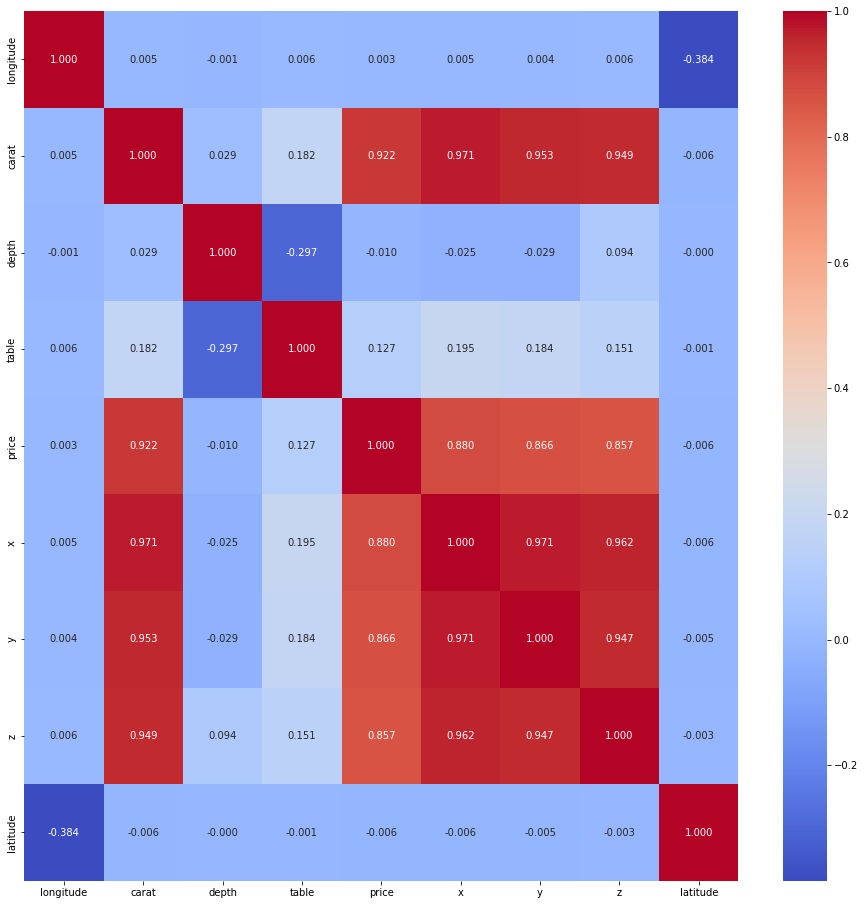

In [31]:
plt.figure(figsize=(16, 16))
sns.heatmap(numerical_features.corr(), cmap="coolwarm",annot=True, fmt='.3f')

plt.show()

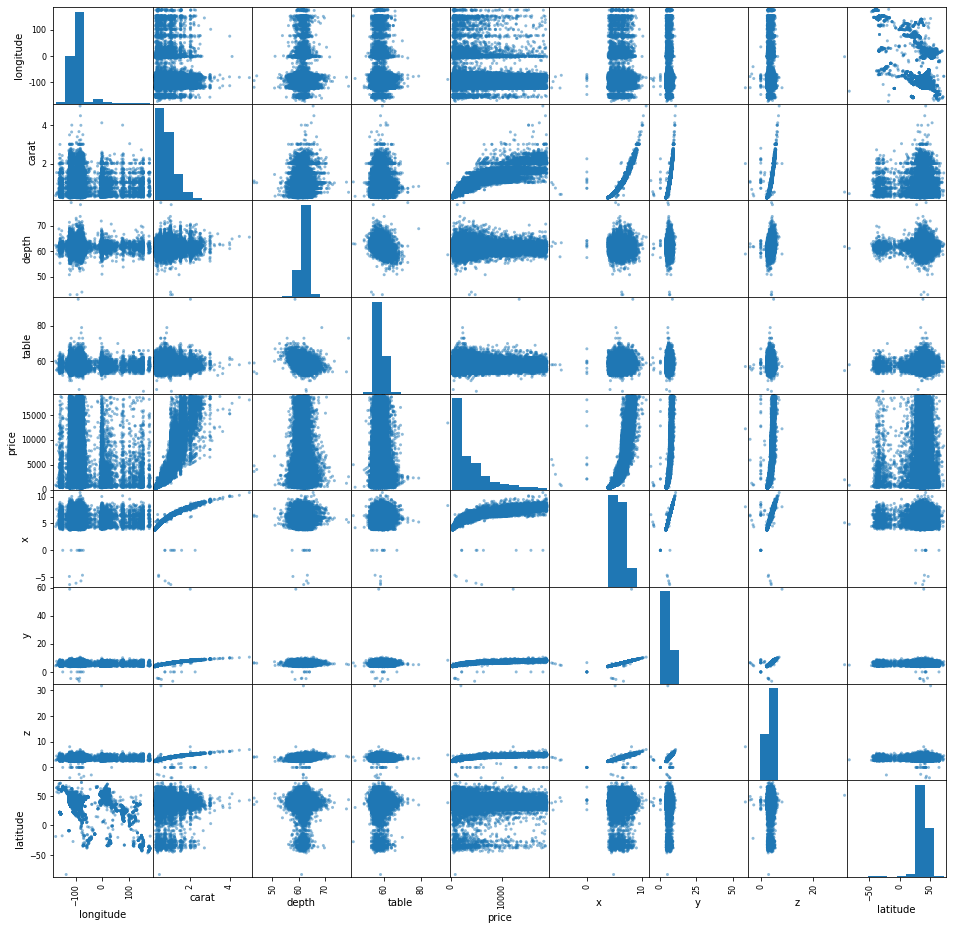

In [32]:
scatter_matrix(numerical_features, figsize=(16,16))
plt.show()

Vamos a analizar los valores nulos de la tabla numérica, y vamos a proceder a realizar la imputación 

In [33]:
numerical_features.isnull().sum()

longitude       0
carat           0
depth        2962
table           0
price           0
x            1090
y             585
z               0
latitude        0
dtype: int64

In [34]:
numerical_features.corr()

,longitude,carat,depth,table,price,x,y,z,latitude
longitude,1.000000,0.005164,-0.000526,0.006203,0.003459,0.005235,0.004246,0.006200,-0.383748
carat,0.005164,1.000000,0.028599,0.181638,0.921590,0.970562,0.952661,0.949214,-0.006410
depth,-0.000526,0.028599,1.000000,-0.297398,-0.009819,-0.025196,-0.028852,0.094398,-0.000065
table,0.006203,0.181638,-0.297398,1.000000,0.127168,0.194687,0.184021,0.150726,-0.000583
price,0.003459,0.921590,-0.009819,0.127168,1.000000,0.880248,0.866186,0.857288,-0.005710
x,0.005235,0.970562,-0.025196,0.194687,0.880248,1.000000,0.970882,0.961530,-0.006357
y,0.004246,0.952661,-0.028852,0.184021,0.866186,0.970882,1.000000,0.947350,-0.005490
z,0.006200,0.949214,0.094398,0.150726,0.857288,0.961530,0.947350,1.000000,-0.003223
latitude,-0.383748,-0.006410,-0.000065,-0.000583,-0.005710,-0.006357,-0.005490,-0.003223,1.000000


Podemos ver que la mayor correlación existente para los valores de X y Y, son carat, precio, X, Y y Z. Podemos usar esos parámetros para imputar los datos a partir de una iteración.

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [36]:
features_to_impute = ['x', 'y', 'z', 'carat', 'price']

In [37]:
data_to_impute_numerical = data[features_to_impute]

In [38]:
data_to_impute_numerical.head()

,x,y,z,carat,price
0,3.95,3.98,2.43,0.23,326
1,3.89,3.84,2.31,0.21,326
2,4.05,4.07,2.31,0.23,327
3,4.20,4.23,2.63,0.29,334
4,4.34,4.35,2.75,0.31,335


In [39]:
imputer = IterativeImputer(random_state=SEED)

In [40]:
imputed = imputer.fit_transform(data_to_impute_numerical)

In [41]:
df_imputed = pd.DataFrame(imputed, columns=data_to_impute_numerical.columns)

In [42]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       53930 non-null  float64
 1   y       53930 non-null  float64
 2   z       53930 non-null  float64
 3   carat   53930 non-null  float64
 4   price   53930 non-null  float64
dtypes: float64(5)
memory usage: 2.1 MB


In [43]:
df_imputed.describe()

,x,y,z,carat,price
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,5.730226,5.733159,3.538141,0.797976,3933.054942
std,1.124319,1.136642,0.708909,0.474035,3989.628569
min,-6.370000,-6.610000,-4.060000,0.200000,326.000000
25%,4.720000,4.730000,2.910000,0.400000,950.000000
50%,5.690000,5.710000,3.530000,0.700000,2401.000000
75%,6.540000,6.530000,4.040000,1.040000,5325.000000
max,10.740000,58.900000,31.800000,5.010000,18823.000000


In [44]:
numerical_features.describe()

,longitude,carat,depth,table,price,x,y,z,latitude
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000,53930.000000
mean,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141,38.137352
std,39.773132,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909,10.485185
min,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000,-82.862752
25%,-112.073333,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,34.147778
50%,-87.889167,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,39.457778
75%,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000,42.800556
max,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,72.700000


Podemos observar que el cambio de la media y desviación estándar ha cambiado muy poco con los nuevos valores añadidos 

In [45]:
numerical_features_imputed = numerical_features.copy()

In [46]:
numerical_features[features_to_impute] = df_imputed

C:\Users\alan_\AppData\Local\Temp\ipykernel_48260\4117680637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features[features_to_impute] = df_imputed


In [47]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  53930 non-null  float64
 1   carat      53930 non-null  float64
 2   depth      50968 non-null  float64
 3   table      53930 non-null  float64
 4   price      53930 non-null  float64
 5   x          53930 non-null  float64
 6   y          53930 non-null  float64
 7   z          53930 non-null  float64
 8   latitude   53930 non-null  float64
dtypes: float64(9)
memory usage: 4.1 MB


Ahora lo que haremos será imputar los valores de depth, que podemos ver tiene una fuerte correlación inversa con table, por lo que usaremos este parámetro para la imputación

In [48]:
dataframe_depth_table = numerical_features[['depth', 'table']]

In [49]:
imputed = imputer.fit_transform(dataframe_depth_table)
df_imputed_depth = pd.DataFrame(imputed, columns=dataframe_depth_table.columns)

In [50]:
numerical_features[dataframe_depth_table.columns] = df_imputed_depth

C:\Users\alan_\AppData\Local\Temp\ipykernel_48260\3139702632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features[dataframe_depth_table.columns] = df_imputed_depth


In [51]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  53930 non-null  float64
 1   carat      53930 non-null  float64
 2   depth      53930 non-null  float64
 3   table      53930 non-null  float64
 4   price      53930 non-null  float64
 5   x          53930 non-null  float64
 6   y          53930 non-null  float64
 7   z          53930 non-null  float64
 8   latitude   53930 non-null  float64
dtypes: float64(9)
memory usage: 4.1 MB


In [52]:
numerical_features.describe()

,longitude,carat,depth,table,price,x,y,z,latitude
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730226,5.733159,3.538141,38.137352
std,39.773132,0.474035,1.396752,2.234578,3989.628569,1.124319,1.136642,0.708909,10.485185
min,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000,-82.862752
25%,-112.073333,0.400000,61.100000,56.000000,950.000000,4.720000,4.730000,2.910000,34.147778
50%,-87.889167,0.700000,61.836716,57.000000,2401.000000,5.690000,5.710000,3.530000,39.457778
75%,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.530000,4.040000,42.800556
max,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,72.700000


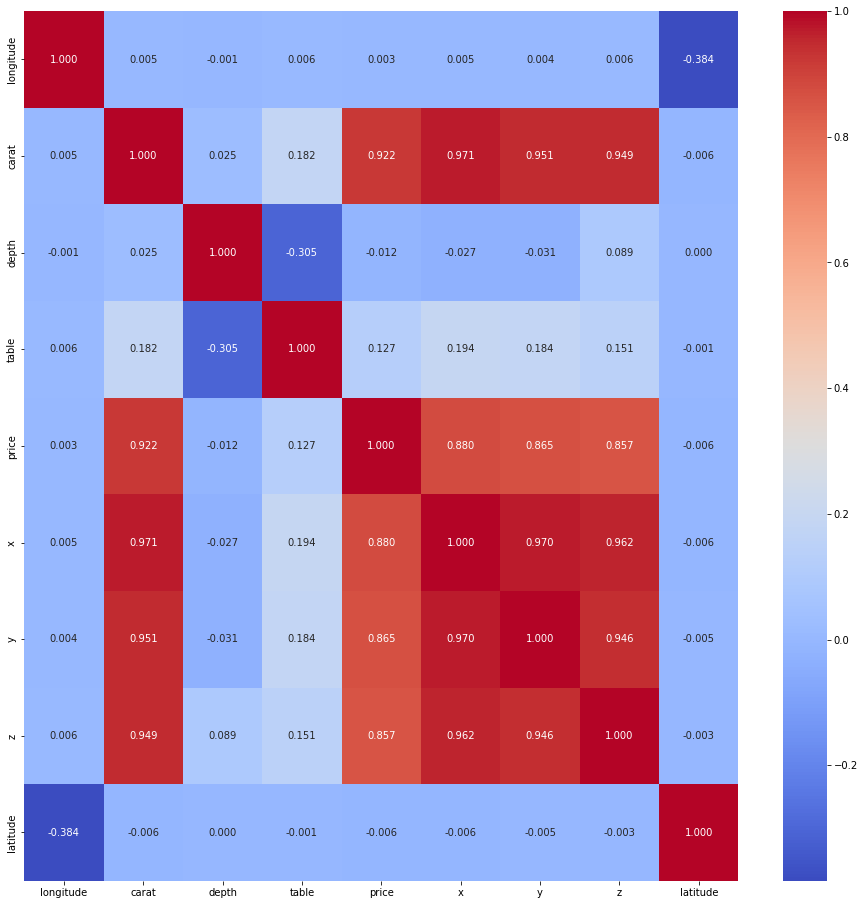

In [53]:
plt.figure(figsize=(16, 16))
sns.heatmap(numerical_features.corr(), cmap="coolwarm",annot=True, fmt='.3f')

plt.show()

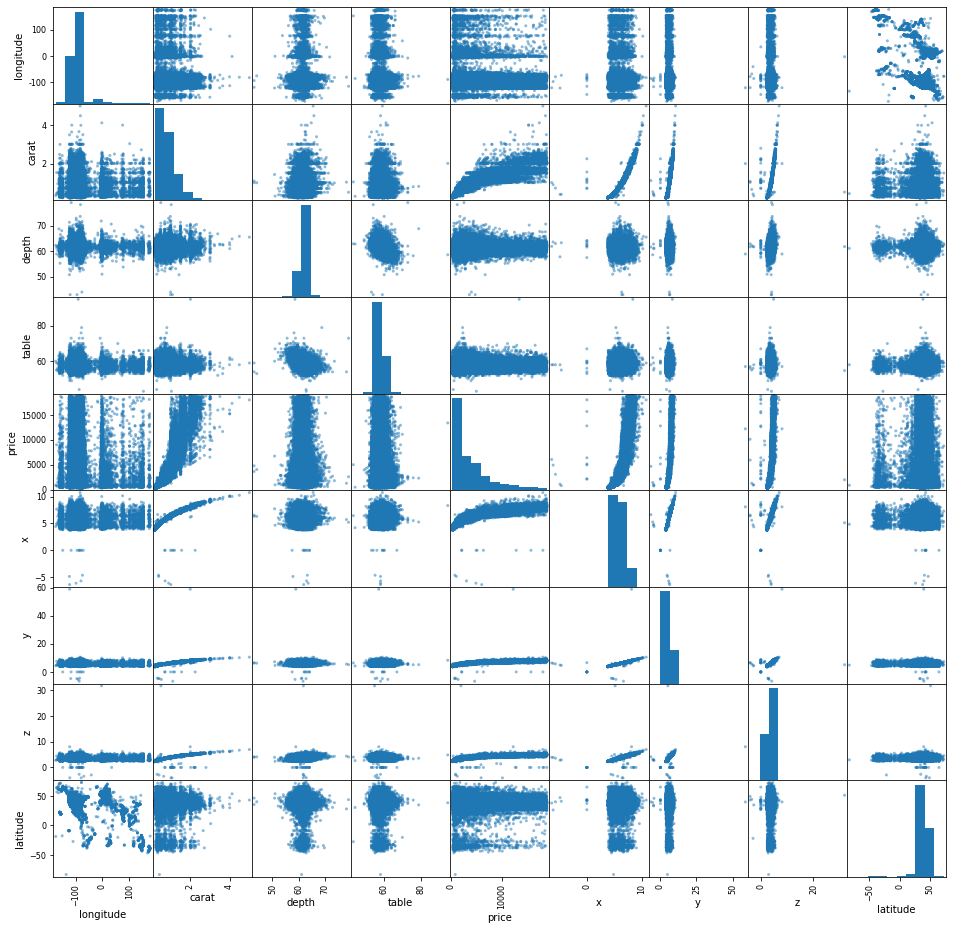

In [54]:
scatter_matrix(numerical_features, figsize=(16,16))
plt.show()

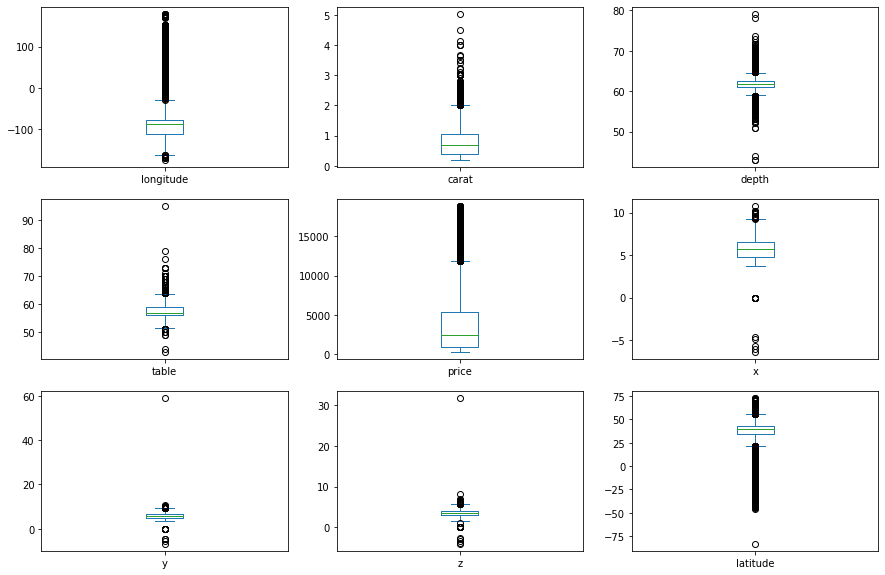

In [55]:
numerical_features.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

Como se observó, X, Y y Z tienen una gran correlación entre sí, por lo que sería ideal utilizar PCA para simplificar el model

In [56]:
correlated_colums = ['x', 'y', 'z']

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(numerical_features[correlated_colums].values)
numerical_pca = pca.transform(numerical_features[correlated_colums].values)
numerical_pca = pd.DataFrame(numerical_pca, columns=['Component 1', 'Component 2'])

In [57]:
numerical_features['component_xyz_1'] = numerical_pca['Component 1'].values
numerical_features['component_xyz_2'] = numerical_pca['Component 2'].values

C:\Users\alan_\AppData\Local\Temp\ipykernel_48260\2460315744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features['component_xyz_1'] = numerical_pca['Component 1'].values
C:\Users\alan_\AppData\Local\Temp\ipykernel_48260\2460315744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features['component_xyz_2'] = numerical_pca['Component 2'].values


In [58]:
numerical_features

,longitude,carat,depth,table,price,x,y,z,latitude,component_xyz_1,component_xyz_2
0,-83.093056,0.23,61.50000,55.0,326.0,3.950000,3.980000,2.43,39.881389,-2.733031,0.035800
1,-111.548889,0.21,59.80000,61.0,326.0,3.890000,3.840000,2.31,33.415000,-2.910794,0.022644
2,-105.101389,0.23,56.90000,65.0,327.0,4.050000,4.070000,2.31,40.167222,-2.657706,0.126932
3,-85.583056,0.29,62.40000,58.0,334.0,4.200000,4.230000,2.63,37.371111,-2.329054,0.009365
4,-121.745000,0.31,63.30000,58.0,335.0,4.340000,4.350000,2.75,48.539444,-2.112660,-0.024491
...,...,...,...,...,...,...,...,...,...,...,...
53925,-121.493333,0.72,60.80000,57.0,2757.0,5.750000,5.760000,3.50,38.581667,0.015038,0.032522
53926,-111.222442,0.72,63.10000,55.0,2757.0,5.690000,5.750000,3.61,32.436381,0.013649,-0.010560
53927,-75.284167,0.70,62.80000,60.0,2757.0,5.660000,5.680000,3.56,40.241389,-0.071244,-0.022590
53928,-122.721944,0.86,61.00000,58.0,2757.0,6.150000,6.120000,3.74,38.822222,0.603452,0.004467


Ahora vamos a quitar las features X, Y y Z

In [59]:
numerical_features = numerical_features.drop(['x', 'y', 'z'], axis=1)

In [60]:
numerical_features

,longitude,carat,depth,table,price,latitude,component_xyz_1,component_xyz_2
0,-83.093056,0.23,61.50000,55.0,326.0,39.881389,-2.733031,0.035800
1,-111.548889,0.21,59.80000,61.0,326.0,33.415000,-2.910794,0.022644
2,-105.101389,0.23,56.90000,65.0,327.0,40.167222,-2.657706,0.126932
3,-85.583056,0.29,62.40000,58.0,334.0,37.371111,-2.329054,0.009365
4,-121.745000,0.31,63.30000,58.0,335.0,48.539444,-2.112660,-0.024491
...,...,...,...,...,...,...,...,...
53925,-121.493333,0.72,60.80000,57.0,2757.0,38.581667,0.015038,0.032522
53926,-111.222442,0.72,63.10000,55.0,2757.0,32.436381,0.013649,-0.010560
53927,-75.284167,0.70,62.80000,60.0,2757.0,40.241389,-0.071244,-0.022590
53928,-122.721944,0.86,61.00000,58.0,2757.0,38.822222,0.603452,0.004467


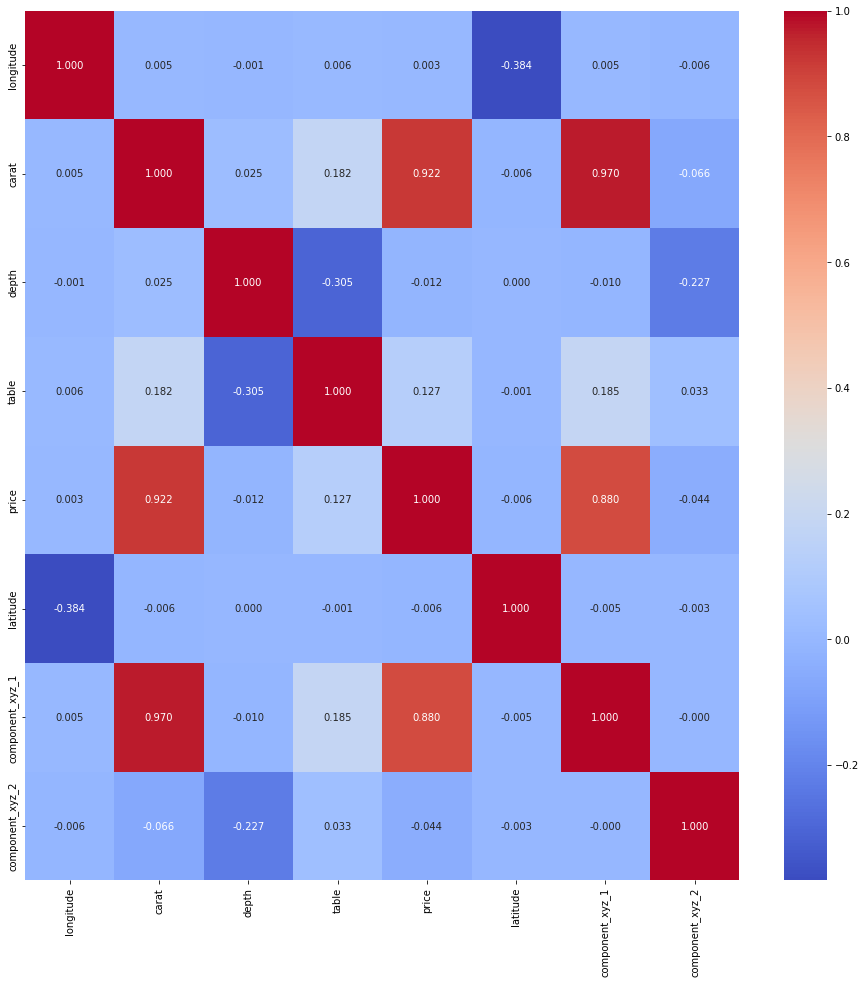

In [61]:
plt.figure(figsize=(16, 16))
sns.heatmap(numerical_features.corr(), cmap="coolwarm",annot=True, fmt='.3f')

plt.show()

Ahora mismo vamos a trabajar con los datos categóricos. Primeramente analizaremos su estructura para determinar que no existan valores con caracteres innecesarios.

In [62]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cut      53930 non-null  object
 1   color    53930 non-null  object
 2   clarity  53930 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [63]:
for column in data_categorical_features:
    print(f'{column}: ', categorical_features[column].unique())

cut:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Very Goo!d' "P*'remium"
 'I#deal' '#Very Good' 'P?remium' "*'Ideal" '!Good' 'Pre!mium' 'Pr?emium'
 'Very Go#od' 'Ide&al' 'Ide!al' 'Id!eal' '&Premium' 'Go?od' 'G#ood'
 "Very *'Good" "Ide*'al" 'V&ery Good' '&Ideal' 'Very G#ood']
color:  ['E' 'I' 'J' 'H' 'F' 'G' 'D' "*'E" '#F' '&G' '!H' '?J' '#D' '&I' '!I' '?G'
 '#H' '?H' '?E' "*'F" '!E' '&F' '#G' "*'I" '!F' '&E']
clarity:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' 'S?I1' 'SI!1' '&VS2'
 '&SI2' "S*'I1" 'VS?1' "S*'I2" '#VS1' 'V&S2' 'V!S2' '!VS2' 'VS#2' "VVS*'2"
 "*'SI2" 'VV?S1' 'S&I1' "*'SI1" 'SI?1' 'VV#S1' 'V#S2' '#SI!1' 'S!I2']


En efecto, podemos ver una enorme cantidad de caracteres especiales que deberían ser eliminados. Para esto podemos usar regex y sólo extraer letras y números

In [64]:
categorical_features_to_fix = categorical_features.copy()

In [65]:
categorical_features_to_fix.columns = categorical_features.columns.str.replace('[^A-Za-z0-9]', '', regex=True)

In [66]:
for column in categorical_features_to_fix:
    categorical_features_to_fix[column] = categorical_features_to_fix[column].str.replace('[^A-Za-z0-9]', '', regex=True)

for column in categorical_features_to_fix:
    print(f'{column}: ', categorical_features_to_fix[column].unique())

cut:  ['Ideal' 'Premium' 'Good' 'VeryGood' 'Fair']
color:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [67]:
categorical_features = categorical_features_to_fix

Ahora haremos one hot encoding  para las columnas de color y clarity. Para la columna de cut haremos un categorical encoding.

In [68]:
categorical_features

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53925,Ideal,D,SI1
53926,Good,D,SI1
53927,VeryGood,D,SI1
53928,Premium,H,SI2


In [69]:
ordinal_mapping = {'Fair': 1, 'Good': 2, 'VeryGood': 3, 'Premium': 4, 'Ideal': 5}

In [70]:
categorical_features['cut_ordinal'] = categorical_features['cut'].map(ordinal_mapping).drop(columns=['cut'])
categorical_features = categorical_features.drop(columns=['cut'])

In [71]:
categorical_features

,color,clarity,cut_ordinal
0,E,SI2,5
1,E,SI1,4
2,E,VS1,2
3,I,VS2,4
4,J,SI2,2
...,...,...,...
53925,D,SI1,5
53926,D,SI1,2
53927,D,SI1,3
53928,H,SI2,4


In [72]:
features_to_one_hot = categorical_features[['color', 'clarity']]

In [73]:
features_to_one_hot

,color,clarity
0,E,SI2
1,E,SI1
2,E,VS1
3,I,VS2
4,J,SI2
...,...,...
53925,D,SI1
53926,D,SI1
53927,D,SI1
53928,H,SI2


In [74]:
from sklearn.preprocessing import OneHotEncoder


In [75]:
one_hot_encoder = OneHotEncoder(sparse=False, drop='first') 

In [76]:
encoded_features = one_hot_encoder.fit_transform(features_to_one_hot)

c:\Users\alan_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [77]:
encoded_columns = one_hot_encoder.get_feature_names_out(['color', 'clarity'])


In [78]:
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)


In [79]:
categorical_features = pd.concat([categorical_features, encoded_df], axis=1)
categorical_features = categorical_features.drop(columns=['color', 'clarity'])


In [80]:
categorical_features

,cut_ordinal,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53926,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53927,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53928,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cut_ordinal   53930 non-null  int64  
 1   color_E       53930 non-null  float64
 2   color_F       53930 non-null  float64
 3   color_G       53930 non-null  float64
 4   color_H       53930 non-null  float64
 5   color_I       53930 non-null  float64
 6   color_J       53930 non-null  float64
 7   clarity_IF    53930 non-null  float64
 8   clarity_SI1   53930 non-null  float64
 9   clarity_SI2   53930 non-null  float64
 10  clarity_VS1   53930 non-null  float64
 11  clarity_VS2   53930 non-null  float64
 12  clarity_VVS1  53930 non-null  float64
 13  clarity_VVS2  53930 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 6.2 MB


Ahora que ya hemos convertido los datos categóricos a numéricos, juntaremos ambos dataframes para hacer el train-test-split e implementar un modelo

In [82]:
dataframe = pd.concat([categorical_features, numerical_features], axis=1)

In [83]:
dataframe

,cut_ordinal,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,...,clarity_VVS1,clarity_VVS2,longitude,carat,depth,table,price,latitude,component_xyz_1,component_xyz_2
0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-83.093056,0.23,61.50000,55.0,326.0,39.881389,-2.733031,0.035800
1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-111.548889,0.21,59.80000,61.0,326.0,33.415000,-2.910794,0.022644
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-105.101389,0.23,56.90000,65.0,327.0,40.167222,-2.657706,0.126932
3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-85.583056,0.29,62.40000,58.0,334.0,37.371111,-2.329054,0.009365
4,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,-121.745000,0.31,63.30000,58.0,335.0,48.539444,-2.112660,-0.024491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-121.493333,0.72,60.80000,57.0,2757.0,38.581667,0.015038,0.032522
53926,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-111.222442,0.72,63.10000,55.0,2757.0,32.436381,0.013649,-0.010560
53927,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-75.284167,0.70,62.80000,60.0,2757.0,40.241389,-0.071244,-0.022590
53928,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-122.721944,0.86,61.00000,58.0,2757.0,38.822222,0.603452,0.004467


In [84]:
dataframe.describe()

,cut_ordinal,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,...,clarity_VVS1,clarity_VVS2,longitude,carat,depth,table,price,latitude,component_xyz_1,component_xyz_2
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,...,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,5.393000e+04,5.393000e+04
mean,3.904061,0.181643,0.176915,0.209308,0.153977,0.100501,0.052049,0.033191,0.242258,0.170462,...,0.067773,0.093881,-86.693792,0.797976,61.749425,57.457328,3933.054942,38.137352,3.415032e-16,8.012216e-16
std,1.116593,0.385553,0.381600,0.406819,0.360930,0.300669,0.222128,0.179137,0.428454,0.376041,...,0.251358,0.291666,39.773132,0.474035,1.396752,2.234578,3989.628569,10.485185,1.728692e+00,2.096558e-01
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-173.985008,0.200000,43.000000,43.000000,326.000000,-82.862752,-8.844311e+00,-1.559174e+01
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-112.073333,0.400000,61.100000,56.000000,950.000000,34.147778,-1.548506e+00,-3.113012e-02
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-87.889167,0.700000,61.836716,57.000000,2401.000000,39.457778,-3.898764e-02,4.818254e-03
75%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-78.680278,1.040000,62.500000,59.000000,5325.000000,42.800556,1.220710e+00,3.189807e-02
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,178.017649,5.010000,79.000000,95.000000,18823.000000,72.700000,3.794951e+01,3.563116e+01


In [85]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53930 entries, 0 to 53929
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cut_ordinal      53930 non-null  int64  
 1   color_E          53930 non-null  float64
 2   color_F          53930 non-null  float64
 3   color_G          53930 non-null  float64
 4   color_H          53930 non-null  float64
 5   color_I          53930 non-null  float64
 6   color_J          53930 non-null  float64
 7   clarity_IF       53930 non-null  float64
 8   clarity_SI1      53930 non-null  float64
 9   clarity_SI2      53930 non-null  float64
 10  clarity_VS1      53930 non-null  float64
 11  clarity_VS2      53930 non-null  float64
 12  clarity_VVS1     53930 non-null  float64
 13  clarity_VVS2     53930 non-null  float64
 14  longitude        53930 non-null  float64
 15  carat            53930 non-null  float64
 16  depth            53930 non-null  float64
 17  table       

Nuestro valor a buscar es el precio, por tanto nuestro target (y) será 'price'. El resto de valores serán los datos (x)

In [86]:
target_name = "price"

In [87]:
data, target = dataframe.drop(columns=target_name), dataframe[target_name]

In [88]:
from sklearn.model_selection import train_test_split

Ahora haremos el train test split con un tamaño del test de 0.2

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=SEED)

Una vez esto, nos encargaremos de desarrollar un modelo y revisar los resultados del mismo. Para esto implementaré sólo una regresión lineal, y un random forest.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, GridSearchCV


Primeramente trabajaremos con una regresión lineal

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
y_pred = lr.predict(X_test)


linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {linear_mae}")
print(f"Mean Squared Error (MSE): {linear_mse}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse}")
print(f"R-squared (R2 Score): {linear_r2}")

Mean Absolute Error (MAE): 729.5717900948173
Mean Squared Error (MSE): 1165298.4185949266
Root Mean Squared Error (RMSE): 1079.4898881392667
R-squared (R2 Score): 0.9246416675198541


Ahora implementamos el random forest regressor, utilicé gridsearchcv pero por el alto tiempo que tomaba el entrenamiento, preferí dejar únicamente el modelo simple

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43144 entries, 13451 to 15795
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cut_ordinal      43144 non-null  int64  
 1   color_E          43144 non-null  float64
 2   color_F          43144 non-null  float64
 3   color_G          43144 non-null  float64
 4   color_H          43144 non-null  float64
 5   color_I          43144 non-null  float64
 6   color_J          43144 non-null  float64
 7   clarity_IF       43144 non-null  float64
 8   clarity_SI1      43144 non-null  float64
 9   clarity_SI2      43144 non-null  float64
 10  clarity_VS1      43144 non-null  float64
 11  clarity_VS2      43144 non-null  float64
 12  clarity_VVS1     43144 non-null  float64
 13  clarity_VVS2     43144 non-null  float64
 14  longitude        43144 non-null  float64
 15  carat            43144 non-null  float64
 16  depth            43144 non-null  float64
 17  table   

In [93]:
print(X_train.columns)


Index(['cut_ordinal', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'longitude', 'carat',
       'depth', 'table', 'latitude', 'component_xyz_1', 'component_xyz_2'],
      dtype='object')


In [94]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10786 entries, 34222 to 2495
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cut_ordinal      10786 non-null  int64  
 1   color_E          10786 non-null  float64
 2   color_F          10786 non-null  float64
 3   color_G          10786 non-null  float64
 4   color_H          10786 non-null  float64
 5   color_I          10786 non-null  float64
 6   color_J          10786 non-null  float64
 7   clarity_IF       10786 non-null  float64
 8   clarity_SI1      10786 non-null  float64
 9   clarity_SI2      10786 non-null  float64
 10  clarity_VS1      10786 non-null  float64
 11  clarity_VS2      10786 non-null  float64
 12  clarity_VVS1     10786 non-null  float64
 13  clarity_VVS2     10786 non-null  float64
 14  longitude        10786 non-null  float64
 15  carat            10786 non-null  float64
 16  depth            10786 non-null  float64
 17  table    

In [95]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=SEED)

rf.fit(X_train, y_train)
rf.score(X_train, y_train)

rf_y_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"R-squared (R2 Score): {rf_r2}")

Mean Absolute Error (MAE): 299.7144761728166
Mean Squared Error (MSE): 431195.5442661598
Root Mean Squared Error (RMSE): 656.6548136320633
R-squared (R2 Score): 0.9721151452106602


Lo ideal hubiera sido haber implementado todo usando las pipelines de scikit-learn. Por cuestión de tiempo no lo hice, pero esto nos permite poder debuggear mejor y simplificar los pasos, ya que no sería necesario hacer nuevamente la transformación de los datos para las predicciones

In [96]:
stolen_diamonds_dataframe

,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates
0,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351"
1,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961"
2,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673"
3,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730"
4,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602"
5,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87,"35.26611, -99.63874"
6,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16,"35.51572, -97.67080"
7,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13,"36.163605, -95.75950"
8,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,"37.689186, -92.6473"
9,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86,"38.66303, -90.21808"


In [97]:
stolen_diamonds_dataframe.columns = stolen_diamonds_dataframe.columns.map(lambda x: x.strip().lower())


Ahora implementaremos la transformación de los datos que se usarán para predecir el precio de los diamantes perdidos. La columna de coordenadas será transformada en latitud y longitud.

In [98]:
latitude_col = []
longitude_col = []

for latitude, longitude in stolen_diamonds_dataframe.coordinates.str.split(','):
    latitude_col.append(latitude)
    longitude_col.append(longitude)
    
stolen_diamonds_dataframe['latitude'] = np.array(latitude_col, float)
stolen_diamonds_dataframe['longitude'] = np.array(longitude_col, float)
stolen_diamonds_dataframe.drop('coordinates', axis = 1, inplace=True)

In [99]:
stolen_diamonds_dataframe

,carat,cut,color,clarity,depth,table,x,y,z,latitude,longitude
0,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,35.026360,-114.383510
1,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,35.003500,-109.789610
2,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,35.105440,-106.669673
3,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,34.946660,-104.647300
4,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,35.188640,-101.986020
5,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87,35.266110,-99.638740
6,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16,35.515720,-97.670800
7,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13,36.163605,-95.759500
8,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,37.689186,-92.647300
9,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86,38.663030,-90.218080


In [100]:
new_data_numerical_features = stolen_diamonds_dataframe.select_dtypes(include=["int64", "float64"]).columns.tolist()
new_data_categorical_features = stolen_diamonds_dataframe.drop(columns=new_data_numerical_features).columns.tolist()
new_data_categorical = stolen_diamonds_dataframe[new_data_categorical_features]
new_data_numerical = stolen_diamonds_dataframe[new_data_numerical_features]

In [101]:
new_data_categorical['cut_ordinal'] = new_data_categorical['cut'].map(ordinal_mapping).drop(columns=['çut'])
new_data_categorical = new_data_categorical.drop(columns=['cut'])

C:\Users\alan_\AppData\Local\Temp\ipykernel_48260\779657709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_categorical['cut_ordinal'] = new_data_categorical['cut'].map(ordinal_mapping).drop(columns=['çut'])


In [102]:
new_features_to_one_hot = new_data_categorical[['color', 'clarity']]
encoded_features_new = one_hot_encoder.transform(new_features_to_one_hot)
encoded_columns = one_hot_encoder.get_feature_names_out(['color', 'clarity'])

encoded_df_new = pd.DataFrame(encoded_features_new, columns=encoded_columns)

In [103]:
correlated_columns = ['x', 'y', 'z']
numerical_pca_new = pca.transform(new_data_numerical[correlated_columns].values)
numerical_pca_new = pd.DataFrame(numerical_pca_new, columns=['Component 1', 'Component 2'])
new_data_numerical['component_xyz_1'] = numerical_pca_new['Component 1'].values
new_data_numerical['component_xyz_2'] = numerical_pca_new['Component 2'].values

new_data_numerical = new_data_numerical.drop(['x', 'y', 'z'], axis=1)

C:\Users\alan_\AppData\Local\Temp\ipykernel_48260\1766928990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_numerical['component_xyz_1'] = numerical_pca_new['Component 1'].values
C:\Users\alan_\AppData\Local\Temp\ipykernel_48260\1766928990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_numerical['component_xyz_2'] = numerical_pca_new['Component 2'].values


In [104]:
new_data_processed = pd.concat([new_data_categorical, new_data_numerical, encoded_df_new], axis=1)

In [105]:
new_data_processed = new_data_processed.drop(columns=['color', 'clarity'])


In [106]:
new_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cut_ordinal      10 non-null     int64  
 1   carat            10 non-null     float64
 2   depth            10 non-null     float64
 3   table            10 non-null     float64
 4   latitude         10 non-null     float64
 5   longitude        10 non-null     float64
 6   component_xyz_1  10 non-null     float64
 7   component_xyz_2  10 non-null     float64
 8   color_E          10 non-null     float64
 9   color_F          10 non-null     float64
 10  color_G          10 non-null     float64
 11  color_H          10 non-null     float64
 12  color_I          10 non-null     float64
 13  color_J          10 non-null     float64
 14  clarity_IF       10 non-null     float64
 15  clarity_SI1      10 non-null     float64
 16  clarity_SI2      10 non-null     float64
 17  clarity_VS1      10

In [111]:
new_data_processed = new_data_processed[X_train.columns]


In [112]:
predictions = rf.predict(new_data_processed)  

In [113]:
new_data_processed['price'] = predictions


C:\Users\alan_\AppData\Local\Temp\ipykernel_48260\4135556782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_processed['price'] = predictions


In [115]:
new_data_processed

,cut_ordinal,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,...,clarity_VVS1,clarity_VVS2,longitude,carat,depth,table,latitude,component_xyz_1,component_xyz_2,price
0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-114.383510,0.71,63.1,58.0,35.026360,-0.056647,-0.003381,2395.51
1,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-109.789610,0.83,62.1,55.0,35.003500,0.477916,0.000123,4086.95
2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-106.669673,0.50,61.5,55.0,35.105440,-0.924508,0.035791,1626.68
3,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-104.647300,0.39,61.6,59.0,34.946660,-1.609321,0.030261,627.97
4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-101.986020,0.32,62.1,56.0,35.188640,-2.025976,-0.018675,821.92
5,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-99.638740,0.90,63.3,57.0,35.266110,0.623118,-0.023446,3392.29
6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-97.670800,0.51,60.9,57.0,35.515720,-0.859884,0.006774,1863.38
7,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-95.759500,1.12,62.1,54.8,36.163605,1.427011,-0.009532,8932.17
8,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-92.647300,0.40,62.4,56.0,37.689186,-1.533575,-0.000621,967.05
9,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-90.218080,0.36,62.7,59.0,38.663030,-1.789881,0.003659,562.81


In [114]:
print('The total value of all the stolen diamonds is: ', new_data_processed.price.sum())

The total value of all the stolen diamonds is:  25276.73
